Notebook to get and clean the data of Il Corriere della Sera newspaper about the covid19 vaccination

In [1]:
from helpers import *

In [53]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Get LATEST driver version for 96.0.4664
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_linux64.zip
Driver has been saved in cache [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45]


In [54]:
search_url='https://www.corriere.it/'

driver.get(search_url) 
time.sleep(1)
# Aceptar cookkies


In [163]:
# def login(): 
#     driver.find_element_by_xpath('//*[@id="l-header"]/div[1]/div[1]/nav/div/div[3]/ul/li[5]/a[1]').click()
#     time.sleep(1)
#     driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[1]/input').send_keys(email)
#     driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[2]/input').send_keys(password)
#     time.sleep(1)
#     driver.find_element_by_xpath('/html/body/div[1]/main/div/div[2]/form/div/div/div/div[3]/input').click()

In [70]:
# def get_links_corriere(search_URL): 
#     list_links=[]
#     driver.get(search_URL)
#     while True: 
#         links = driver.find_elements_by_xpath('//h1//a')
#         for i in links: 
#             list_links.append(i.get_attribute('href'))
#         try :
#             next = driver.find_element_by_xpath('//div[@class="more-news-search"]')
#             time.sleep(5)
#             next.click()
            
#         except :
#             print("No more pages left")
#             break
#     return list_links

In [2]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
def get_links_corriere(url): 
    list_links_corriere=[]
    driver.get(url)
    # Pulsa el boton mientras lo haya, porque se van añadiendo, es ver siguientes,
    #una vez tenemos todos cargados, los metemos en la lista, porque si los recopilamos cada vez que pulsamos el boton
    #ver siguientes habría muchos duplicados.
    while True: 
        time.sleep(5)
        try: 
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="more-news-search"]')))
            next = driver.find_element_by_xpath('//div[@class="more-news-search"]')
            next.click()
        except :
            try:
                driver.find_element_by_xpath('//button[@class="tp-close tp-active"]').click()
                continue
            except:
                print("No more pages left")
                break
    links = driver.find_elements_by_xpath('//h1/a')
    for i in links: 
        list_links_corriere.append(i.get_attribute('href'))
    return list_links_corriere

In [72]:
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.by import By
# def get_html_corriere(list_links):
#     extracted_articles=0 
#     extracted_articles_fail=0
#     for i in list_links:
#         driver.get(i)    
#         try:
#             WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//a[@class='LoginTop navbar-link login' and contains(text(),'15752729')]")))
#             html = driver.page_source
#             tail=i.split('/')[-1]
#             extracted_articles += 1
#             with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/CORRIERE/{tail}.txt', 'w') as f: 
#                 f.write(html)
            
#         except: 
#             print("fail")
#             extracted_articles_fail += 1
#             continue
#         print(f'Extracted articles: {extracted_articles} of {len(list_links)}  Extracted failed articles: {extracted_articles_fail}',end='\r')

In [55]:
def get_html_corriere(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/CORRIERE/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [74]:
search_URL='https://sitesearch.corriere.it/forward.jsp?q=vaccinazione#'
list_links_corriere=get_links_corriere(search_URL)

No more pages left


In [75]:
## TO MANY requests, so we continue with the list, after waiting a bit, but we dont charge again the URL because
# we would lose the charged links

In [76]:
def get_links_corriere_continuation(): 
    list_links_corriere=[]
    # Pulsa el boton mientras lo haya, porque se van añadiendo, es ver siguientes,
    #una vez tenemos todos cargados, los metemos en la lista, porque si los recopilamos cada vez que pulsamos el boton
    #ver siguientes habría muchos duplicados.
    while True: 
        time.sleep(5)
        try: 
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="more-news-search"]')))
            next = driver.find_element_by_xpath('//div[@class="more-news-search"]')
            next.click()
        except :
            try:
                driver.find_element_by_xpath('//button[@class="tp-close tp-active"]').click()
                continue
            except:
                print("No more pages left")
                break
    links = driver.find_elements_by_xpath('//h1/a')
    for i in links: 
        list_links_corriere.append(i.get_attribute('href'))
    return list_links_corriere

In [92]:
list_links_corriere=get_links_corriere_continuation()

No more pages left


In [93]:
len(set(list_links_corriere))

5776

In [94]:
# Store the list in a document
with open("list_links_vacunacion_corriere.txt", 'w') as f:
    for s in list_links_corriere:
        f.write(str(s) + '\n')

In [95]:
with open("list_links_vacunacion_corriere.txt", 'r') as f:
    list_links_corriere = [line.rstrip('\n') for line in f]

In [97]:
len(set(list_links_corriere))

5776

In [168]:
# get_html_corriere(list_links_corriere)

In [170]:
# get_html_corriere(list_links_corriere[434:])

In [171]:
# get_html_corriere(list_links_corriere[1000:])

In [172]:
# get_html_corriere(list_links_corriere[1290:])

In [173]:
# get_html_corriere(list_links_corriere[2746:])

In [174]:
# get_html_corriere(list_links_corriere[2896:])

In [175]:
# get_html_corriere(list_links_corriere[3311:])

In [176]:
# get_html_corriere(list_links_corriere[3411:])

In [179]:
# get_html_corriere(list_links_corriere[3721:])

In [182]:
get_html_corriere(list_links_corriere[4391:])

In [ ]:
import os
import re
list_articles_corriere=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/CORRIERE/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/CORRIERE/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        if soup.find("h1",class_="title-section is--medium"):
            soup.find("h1",class_="title-section is--medium").decompose()
        regex = re.compile('title')
        title=soup.find("h1",{"class" : regex}).text.strip()

    except: 
        title="error"
        
    try:
        author=soup.find("span",class_='firma firma-corriere fr-old').text.strip()
    except: 
        try:
            author = soup.find("span",class_='writer').text.strip()
        except: 
            try: 
                author = soup.find("span",class_='author-art is-small').text.strip()
            except: 
                try: 
                    author = soup.find("strong",class_='signature').text.strip()
                except:
                    author="error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find("h2",class_="article-subtitle").text.strip()
    except: 
        try:
            regex=re.compile('summary-art')
            subheadline=soup.find("p",{"class": regex}).text.strip()
        except: 
            subheadline="error"
            
    try:
        if soup.find("div",class_="article-date-place"):
            date=soup.find("div",class_="article-date-place").text.strip()
        elif soup.find("p",class_="is-last-update"):
            date=soup.find("p",class_="is-last-update").text.strip()
        else:
            regex = re.compile('article-date')
            date= soup.find("span",{"class":regex}).text.strip()
    except: 
        date="error"
    try:
        if soup.find_all("p",class_="chapter-paragraph"):
            tf=soup.find_all("p",class_="chapter-paragraph")
            for p in tf:
                list_text.append(p.get_text().strip())
            text=' '.join(list_text).strip()
            
        elif soup.find("div",class_="content"):
            tf=soup.find_all("div",class_="content")#.find_all("p")
            for p in tf:
                list_text.append(p.get_text().strip())
            text=' '.join(list_text).strip()            
    except: 
        text= "error"
    list_articles_corriere.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [21]:
articles_corriere = pd.DataFrame.from_dict(list_articles_corriere)
articles_corriere

,Title,Subheadline,Text,Authors,Date,Link
0,"Vaccini in Veneto, prenotazioni libere dal 3 g...","Via libera alla fascia 12-39 anni, agenda aper...",«Dal 3 giugno via libera a tutti con l’apertur...,Redazione Online,1 giugno 2021 (modifica il 3 giugno 2021 | 14:46),https://corrieredelveneto.corriere.it/veneto/p...
1,"Covid, il bollettino della Sicilia: 618 i nuo...","L’incidenza scende al 5% , dato percentuale ch...",Sono 618 i nuovi casi di Covid 19 registrati n...,error,13 settembre 2021 | 18:15,https://corrieredelmezzogiorno.corriere.it/pal...
2,"Parma, in anticipo il primo caso di influenza ...","Identificato il ceppo di tipo A, su un bambino...",Identificato il primo caso di influenza stagio...,Redazione Online,29 settembre 2020 (modifica il 29 settembre 20...,https://www.corriere.it/salute/20_settembre_29...
3,Bertolaso: «La locomotiva sui vaccini adesso è...,«I festeggiamenti per l’Inter? Da condannare. ...,Una riunione dietro l’altra. Al tavolo sono in...,Stefano Landi,4 maggio 2021 (modifica il 4 maggio 2021 | 09:01),https://www.corriere.it/politica/21_maggio_04/...
4,"AstraZeneca, sospeso il vaccino in Italia, Ger...",L’Aifa ha sospeso la somministrazione del vacc...,"L’Agenzia per il farmaco italiana, Aifa, ha co...",Redazione Online,15 marzo 2021 (modifica il 15 marzo 2021 | 22:25),https://www.corriere.it/salute/cardiologia/21_...
...,...,...,...,...,...,...
5749,"Vaccini in Lombardia, i medici di famiglia: «C...",Pedrini (Fimmg): «Entrambe le profilassi sono ...,"«Dottoressa, quando tocca a me?». Qualcuno ha ...",Sara Bettoni,21 settembre 2021 | 07:12,https://milano.corriere.it/notizie/cronaca/21_...
5750,Vaccinare al più presto i malati oncologici,Dovrebbero essere gli specialisti di riferimen...,I n Italia 400mila persone con tumori solidi e...,"Francesco Cognetti, presidente Foce (Federazio...",25 febbraio 2021 (modifica il 25 febbraio 2021...,https://www.corriere.it/salute/sportello_cancr...
5751,"Vaccini, dal 14 febbraio via alla Fase 2Ecco l...",L’annuncio di Giani: via alla campagna per i l...,"Domenica 14 febbraio, nei primi 49 centri vacc...",Giulio Gori,6 febbraio 2021 | 14:05,https://corrierefiorentino.corriere.it/firenze...
5752,"Covid, Zaia: «In Veneto i turisti sono sacri, ...",Il governatore insiste sulla necessità di gara...,«In Veneto il turista è sacro e non vedo cosa ...,Mauro Giordano,19 maggio 2021 (modifica il 19 maggio 2021 | 1...,https://corrieredelveneto.corriere.it/veneto/p...


# CLEAN DATASET

In [22]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('1/8', '', text)
    text = re.sub('© Riproduzione Riservata', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub('\u200b', '', text)
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

In [23]:
articles_corriere=articles_corriere.drop(articles_corriere[articles_corriere['Title']=="error"].index, inplace=False)
#9 articles that dont take the text when we do get_html
articles_corriere=articles_corriere.drop(articles_corriere[articles_corriere['Text']==""].index, inplace=False)
articles_corriere=articles_corriere.drop(articles_corriere[articles_corriere['Date']=="error"].index, inplace=False)

In [24]:
articles_corriere['Text']=articles_corriere['Text'].apply(preprocessor)
articles_corriere['n_words'] = articles_corriere.Text.apply(lambda x: len(str(x).split(' ')))
articles_corriere['Newspaper']= 'Corriere della Sera'
articles_corriere['Country']= 'Italy'

In [25]:
#date of this articles are problematic
articles_corriere=articles_corriere.drop(articles_corriere[articles_corriere['Date'].str.contains("di ")].index, inplace=False)



In [26]:
#Date
#This one gave us error, so I put settembre mannually
articles_corriere.Date[1821]='12 settembre 2021'
articles_corriere['Date'] = articles_corriere['Date'].str.split("(").str[0]
articles_corriere['Date'] = articles_corriere['Date'].str.split("|").str[0]
articles_corriere['Date'] = articles_corriere['Date'].str.split(",").str[0]
articles_corriere['Date'] = articles_corriere['Date'].str.split("+").str[0]
for index,row in articles_corriere.iterrows(): 
    try:
        articles_corriere['Date'][index] =dateparser.parse(row.Date).date()
    except: 
        continue



/tmp/ipykernel_98999/3705310197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_corriere.Date[1821]='12 settembre 2021'
/home/david/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
/tmp/ipykernel_98999/3705310197.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_corriere['Date'][inde

In [27]:
articles_corriere.loc[1821]

Title          Green pass, un decreto per estendere l’obbligo...
Subheadline                                                error
Text           Ma il nodo andrebbe sciolto questa settimana, ...
Authors                                             Enrico Marro
Date                                                  2021-09-12
Link           https://www.corriere.it/economia/lavoro/21_set...
n_words                                                      600
Newspaper                                    Corriere della Sera
Country                                                    Italy
Name: 1821, dtype: object

In [28]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_corriere.iterrows(): 
    try:
        articles_corriere['Date'][index] =datetime.strptime(articles_corriere['Date'][index], '%Y-%m-%d').date()
    except: 
        continue

articles_corriere=articles_corriere[~articles_corriere['Date'].isnull()]   
for index,row in articles_corriere.iterrows(): 
    try:
        articles_corriere['Date'][index] = articles_corriere['Date'][index].replace(tzinfo=None)
    except: 
        continue
# for index,row in articles_sole.iterrows(): 
#     try:  
#         articles_sole['Date'][index] =articles_sole['Date'][index] .replace("T", " ").replace("Z", "")
#     except: 
#         continue


In [29]:
articles_corriere.Link[4546]

'https://corrieredibologna.corriere.it/bologna/cronaca/21_novembre_23/covid-ricoveri-corsa-terze-dosi-due-facce-quarta-ondata-476f1a72-4bce-11ec-a14f-3ea55597c4f4.shtml'

In [30]:
articles_corriere['Date'] = pd.to_datetime(articles_corriere['Date'],errors='coerce')
articles_corriere.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
4101,"Vaccini nel Lazio, è boom per i bambini sotto...",Superata la soglia del 95% ritenuta necessaria...,Volano le vaccinazioni sui più piccoli a Roma ...,Margherita De Bac,2018-01-29,http://roma.corriere.it/notizie/cronaca/18_gen...,342,Corriere della Sera,Italy
252,Bill Gates vuole creare una super-mucca per pr...,Il miliardario vuole creare bovini geneticamen...,La stampa dOltremanica lha già ribattezzata la...,Francesco Tortora,2018-01-30,http://www.corriere.it/tecnologia/18_gennaio_3...,245,Corriere della Sera,Italy
4049,"Vaccini obbligatori, Raggi è un caso: «A Roma ...",L’Assemble Capitolina pprovato all’unanimità u...,ROMA- Difende il diritto alla «continuità dida...,Maria Egizia Fiaschetti,2018-01-30,http://roma.corriere.it/notizie/cronaca/18_gen...,503,Corriere della Sera,Italy
3055,"Vaccino anti cancro, a Negrar il primo test su...",Il siero è ricavato da tessuti di centinaia di...,VERONA Sarà sperimentato all’ospedale di Negra...,Davide Orsato,2018-01-30,http://corrieredelveneto.corriere.it/verona/cr...,428,Corriere della Sera,Italy
1816,«Vaccini» contro i tumori: quali sono e quando...,error,Esistono 150 ceppi di Papillomavirus (anche de...,Vera Martinella,2018-01-31,http://www.corriere.it/salute/sportello_cancro...,153,Corriere della Sera,Italy
...,...,...,...,...,...,...,...,...,...
206,"Vaccini, la terza dose potranno farla subito 5...",error,"Il provvedimento, in Gazzetta ufficiale da mar...",Diana Cavalcoli,2021-11-23,https://www.corriere.it/economia/consumi/21_no...,401,Corriere della Sera,Italy
2494,"Mauro Mortara, il prof «no mask» di Mantova mu...",Il docente di Storia e filosofia dell’istituto...,Se ne sono accorti i dipendenti quando è arriv...,Giovanni Bernardi,2021-11-23,https://milano.corriere.it/notizie/lombardia/2...,373,Corriere della Sera,Italy
2273,"Sandra Gallina, la dirigente che ha negoziato ...","Per la prima volta, parla la super dirigente c...",Dalla nostra corrispondente Bruxelles — «Crede...,Francesca Basso,2021-11-23,https://www.corriere.it/esteri/21_novembre_23/...,1568,Corriere della Sera,Italy
4546,"Covid, ricoveri su e corsa alle terze dosi: le...",Ora i reparti si riempiono di malati non gravi...,Poco meno di un migliaio di nuovi positivi al ...,Marina Amaduzzi,2021-11-23,https://corrieredibologna.corriere.it/bologna/...,778,Corriere della Sera,Italy


In [ ]:
# #I eliminate the values with different format of the date
# articles_corriere=articles_corriere[~articles_corriere['Date'].isnull()]
# articles_corriere['Date'] = pd.to_datetime(articles_corriere['Date'], utc=True)

In [31]:
#Eliminate before 2020
articles_corriere=articles_corriere[articles_corriere['Date']>'2020-01-01']

In [32]:
articles_corriere=articles_corriere[articles_corriere.Text.str.contains("vacc|Vacc")|articles_corriere.Subheadline.str.contains("vacc|Vacc")|articles_corriere.Title.str.contains("vacc|Vacc")]

In [33]:
articles_corriere=articles_corriere[articles_corriere['n_words']>55]

In [34]:
articles_corriere.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
3094,"Dopo Villongo, un altro caso di meningite nell...","I primi sintomi l’1 gennaio, poi è stata male ...",Nuovo caso di meningite nella zona del lago d’...,Redazione Bergamo online,2020-01-03,https://bergamo.corriere.it/notizie/cronaca/20...,440,Corriere della Sera,Italy
654,"Meningite nella zona del lago d’Iseo, vaccini ...",La campagna si allarga: interessati in 10 mila...,Tamponi salivari a campione tra le persone che...,Desirée Spreafico,2020-01-04,https://bergamo.corriere.it/notizie/cronaca/20...,734,Corriere della Sera,Italy
3431,"Sepsi da meningococco, quinto casomigliora 16...",Trasferito al Papa Giovanni XXIII con febbre a...,Quinto caso di sepsi da meningococco nella Ber...,Redazione online,2020-01-05,https://brescia.corriere.it/notizie/cronaca/20...,327,Corriere della Sera,Italy
768,"Meningite nella zona del lago d’Iseo, l’assess...",Giulio Gallera (Lombardia) dopo il vertice in ...,"L’assessore regionale lombardo al Welfare, Giu...",Redazione Bergamo online,2020-01-05,https://bergamo.corriere.it/notizie/cronaca/20...,572,Corriere della Sera,Italy
2715,«Fascia di sicurezza contro la meningite»: ape...,Oggi l’assessore Gallera incontra i vertici sa...,Gli scatoloni con i nuovi vaccini sono stati r...,Fabio Paravisi,2020-01-07,https://bergamo.corriere.it/notizie/cronaca/20...,769,Corriere della Sera,Italy
...,...,...,...,...,...,...,...,...,...
5478,"Covid, via alla vaccinazione dei quarantenni. ...","Rosignano, muore dopo la seconda iniezione: «...",Il primo giorno di terze dosi ai quarantenni è...,Giulio Gori,2021-11-23,https://corrierefiorentino.corriere.it/firenze...,535,Corriere della Sera,Italy
1579,"Vaccino Lombardia, terza dose anticipata a 5 ...",Le nuove indicazioni del ministero della Salut...,Al via da venerdì 26 novembre la prenotazione ...,Sara Bettoni,2021-11-23,https://milano.corriere.it/notizie/cronaca/21_...,595,Corriere della Sera,Italy
3661,"Covid, in Campania oltre 1.300 bambini contagi...",Sono quelli che non possono ricevere il vaccin...,"«Ad oggi reggiamo, ma cominciamo a registrare ...",Angelo Agrippa,2021-11-23,https://corrieredelmezzogiorno.corriere.it/nap...,596,Corriere della Sera,Italy
3741,"Covid, De Luca accusa di nuovo il Governo: «Do...",Il governatore: «Cosa aspettano a rendere obbl...,Vincenzo De Luca è un vecchio lupo (non di ma...,Felice Naddeo,2021-11-23,https://corrieredelmezzogiorno.corriere.it/nap...,438,Corriere della Sera,Italy


In [35]:
articles_corriere.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_corriere_29_11_2021_premium.csv', index = False)

In [36]:
df= pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_corriere_29_11_2021_premium.csv')

# NER

In [4]:
df_ner= ner(df.Text,"it_core_news_sm")

In [5]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [6]:
#Eliminate wrong entitites
list_wrong_entities=['sull’','–','Regione','Regioni', 'Paese','nell’','d’','Paesi','un’','Un’','C’']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

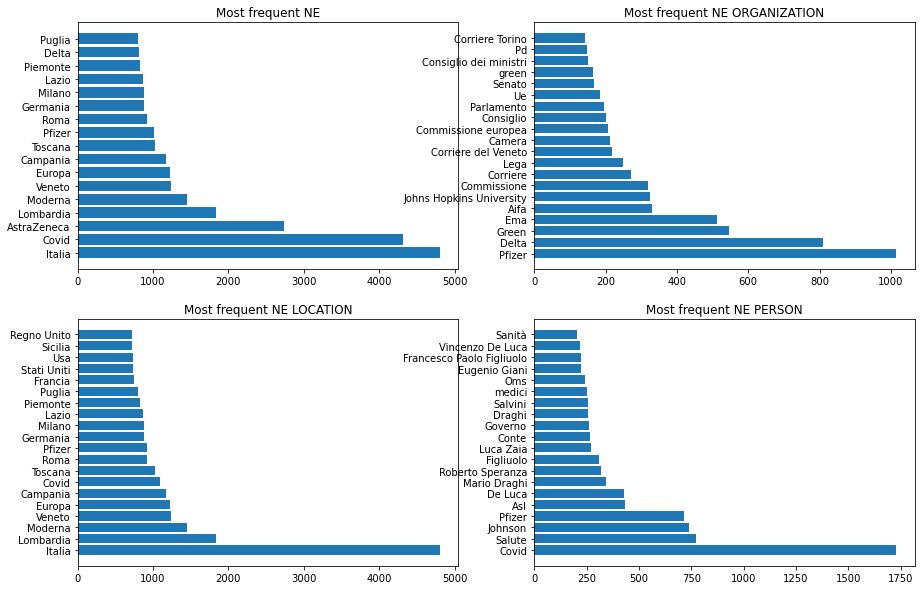

In [7]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')